# Exploratory Data Analysis for the south African Data

We load the necessary packages

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We fist load the data from the University of Cape Town

In [2]:
df = pd.read_csv(r"..\Data\SAdata\2013_A.csv")

Lets get a sight of the data 

In [3]:
df.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid
0,BTW001,12019685,2013-10-01 00:00:00,1.2,1.0
1,BTW001,12019685,2013-10-01 01:00:00,1.2,1.0
2,BTW001,12019685,2013-10-01 02:00:00,1.2,1.0
3,BTW001,12019685,2013-10-01 03:00:00,1.2,1.0
4,BTW001,12019685,2013-10-01 04:00:00,1.2,1.0


There is two IDs, we need to find out which one refers to households. To do so, we will look at the number of data points per ID. There are 8760 hours in a year, we need to look for lengths around this value

In [4]:
#Lengths of Recorder ID groups
groups = df.groupby("RecorderID")['Unitsread'].apply(lambda x: len(x))
groups = groups.sort_values(ascending = False)
print(groups.head())

#Lengths of Profile ID groups
groups1 = df.groupby("ProfileID")['Unitsread'].apply(lambda x: len(x))
groups1 = groups1.sort_values(ascending = False)
print(groups1.head())

RecorderID
HKY024    26856
HKY023    26856
HKY022    26856
HKY021    26856
HKY025    26856
Name: Unitsread, dtype: int64
ProfileID
12020638    8757
12020790    8757
12020621    8757
12020616    8757
12020612    8757
Name: Unitsread, dtype: int64


We can see that the right ID is the profile ID. There is however not exactly 8760 values, lets plot the number of values for each ID to get more insight

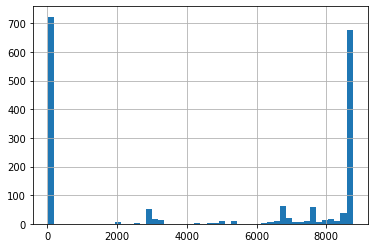

In [5]:
groups1.hist(bins = 50)



There is a lot of IDs with very few values, we should filter them to keep only IDs with enough values

In [6]:
groups1 = groups1[groups1>8700]


df= df[df["ProfileID"].isin(groups1.index)]

When now need to see if the Ids kept have real value or not. To do so, we will sum the reading for each ID and check if some are equal to 0

In [7]:
grp = df.groupby("ProfileID")['Unitsread'].sum()

len(grp[grp == 0])

109

There is a lot of IDs equal to 0, we will filter them out

In [8]:
grp = grp[grp>1]

df= df[df["ProfileID"].isin(grp.index)]

Most of the IDs are still not full for a whole year, there is some timestamps missing. We should identify these timestamp, include nans there and add these to the main dataset. Afterwards, we will have a full dataset, with 8760 entries per remaining Ids


In [9]:
year = pd.date_range("01/01/2013 00:00", "31/12/2013 23:00", freq="1h")

d = [None]*415
add = [None]*415
ids = list(grp.index)
for i in range(len(d)):
    d[i] = df[df["ProfileID"] == ids[i]]
    r = d[i]["Datefield"]
    years = [x.strftime("%Y-%m-%d %H:%M:%S") for x in year]
    main_list = np.setdiff1d(list(years),list(r))
    
    add[i] = pd.DataFrame({"RecorderID": "BTW001", "ProfileID":ids[i], "Datefield": main_list,"Unitsread": np.nan, "Valid": 1})
    
    #d[i] = d[i].append(add[i])
    
    #d[i] = d[i].sort_values(['ProfileID', 'Datefield'])
    
    #d[i] = d[i].reset_index(drop = True)
    
    df = df.append(add[i])
    
df = df.sort_values(['ProfileID', 'Datefield'])

df = df.reset_index(drop = True)



We now have to handle the nans in the dataset


In [12]:
df.to_csv(r"..\Data\SAdata\SA_revised.csv")